## Primary Models
***
This notebook contains the primary prediction models for Capstone 2: Predicting Enrollment: Developing a County Centered Marketing Strategy

In [1]:
# Import Tools
# Import Tools
import pandas as pd
import numpy as np
from sklearn.linear_model import HuberRegressor, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score, auc, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Make Plots Pretty
sns.set()

A decision was made to remove the Catastrophic Tier from the final prediction models.  This is due to the highly regulated and small consumer population involved with this tier.  As such, this tier is unlikely to be chosen as a key tier to make predictions on.  That said a decent Classifier model could be built for this tier upon the companies request.
***
# Huber Regression - Predicting Bronze, Silver, and Gold Tiers

In [2]:
# Read in Data
df = pd.read_csv('Combo_Cleaned.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,cfc,state,county,0-17,18-25,26-34,35-44,45-54,55-64,65+,...,platinum,gold,silver,bronze,catastrophic,new,active_renew,auto_renew,tps,Year
0,12109,FL,St. Johns County,1259.0,1093.0,1566.0,1684.0,2354.0,2963.0,41.0,...,1128.0,594.0,7209.0,1967.0,62.0,5875.0,3783.0,1302.0,10960.0,2015
1,10001,DE,Kent County,413.0,284.0,529.0,530.0,771.0,872.0,18.0,...,107.0,528.0,2136.0,629.0,17.0,1853.0,655.0,909.0,3417.0,2015
2,10003,DE,New Castle County,1964.0,1275.0,2487.0,2333.0,3288.0,3494.0,126.0,...,679.0,2406.0,8835.0,2943.0,104.0,7453.0,3340.0,4174.0,14967.0,2015
3,10005,DE,Sussex County,794.0,436.0,805.0,929.0,1453.0,2204.0,30.0,...,257.0,1144.0,4198.0,1032.0,20.0,3408.0,1531.0,1712.0,6651.0,2015
4,12001,FL,Alachua County,726.0,2161.0,2734.0,1867.0,2250.0,2940.0,41.0,...,1188.0,429.0,9169.0,1848.0,85.0,6443.0,4378.0,1898.0,12719.0,2015


In [3]:
# Create our X and y for the model with individual y's for each metallic tier.

# Our X Dropping the Metallic Tier Targets, String Data, and Categorical Year
X = df.drop(['cfc','state','county','platinum','gold','silver','bronze','catastrophic', 'Year', 'tps'], axis=1).values

# Individual y's for Each Target Data
ybro = df.bronze.values
ysil = df.silver.values
ygold = df.gold.values

# Create List of Target Values and Names of Target Values
ys=[ybro, ysil, ygold]
ys_name = ['Bronze','Silver','Gold']

In [4]:
# Initialize Alphas, and Nameplace (Alphas Derivied from Original Notebook)
huber_alphas=[10,.01,.01]
place = 0

#Iterate through target values, calculate and print RMSE, calculate and print Mean R^2 using 5-Fold CV
for y in ys:
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)
    huber = HuberRegressor(alpha=huber_alphas[place],max_iter=150)
    huber.fit(X_train, y_train)
    pred = huber.predict(X_test)
    score = huber.score(X_test, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    print(ys_name[place], 'Root Mean Squared Error: {}'.format(rmse))
    print(ys_name[place], 'Score: {}'.format(score))
    cv_scores = cross_val_score(huber, X, y, cv=5)
    print(ys_name[place], 'Average 5-Fold R^2: {}'.format(np.mean(cv_scores)),'\n')
    place +=1

Bronze Root Mean Squared Error: 346.0022789721512
Bronze Score: 0.9918514248480578
Bronze Average 5-Fold R^2: 0.9868694300694527 

Silver Root Mean Squared Error: 311.047009880984
Silver Score: 0.9993925405906607
Silver Average 5-Fold R^2: 0.9990118785741284 

Gold Root Mean Squared Error: 195.74817456794653
Gold Score: 0.957038327414591
Gold Average 5-Fold R^2: 0.9106948157161743 



In [5]:
# Instantiate and fit specific tier models for plotting.
bronze = HuberRegressor(alpha=10, max_iter=150)
bronze.fit(X,ybro)

silver = HuberRegressor(alpha=.01, max_iter=150)
silver.fit(X,ysil)

gold = HuberRegressor(alpha=.01, max_iter=150)
gold.fit(X,ygold)

HuberRegressor(alpha=0.01, epsilon=1.35, fit_intercept=True, max_iter=150,
        tol=1e-05, warm_start=False)

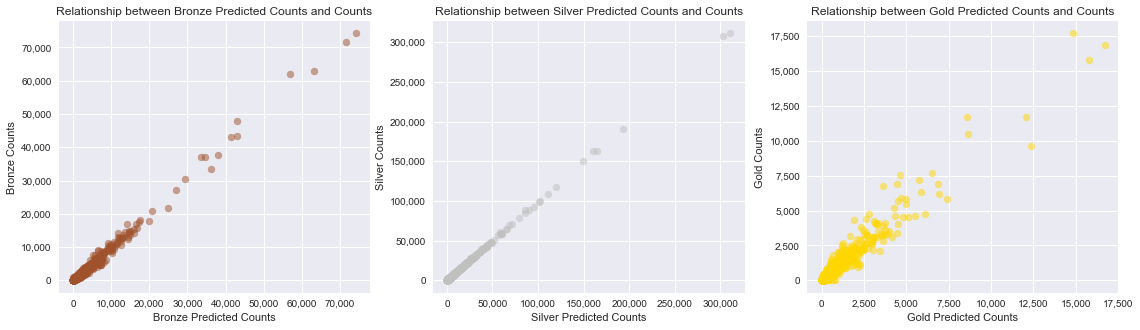

In [6]:
## Plot models predicted counts with actual counts.
fig, axes = plt.subplots(1,3, figsize=(19,5))

_ = axes[0].scatter(bronze.predict(X), df.bronze, color='sienna', alpha=.5)
_ = axes[0].set_ylabel('Bronze Counts')
_ = axes[0].set_xlabel('Bronze Predicted Counts')
_ = axes[0].set_yticklabels(['{:,}'.format(int(x)) for x in axes[0].get_yticks().tolist()])
_ = axes[0].set_xticklabels(['{:,}'.format(int(x)) for x in axes[0].get_xticks().tolist()])
_ = axes[0].set_title('Relationship between Bronze Predicted Counts and Counts')

_ = axes[1].scatter(silver.predict(X), df.silver, color='silver', alpha=.5)
_ = axes[1].set_ylabel('Silver Counts')
_ = axes[1].set_xlabel('Silver Predicted Counts')
_ = axes[1].set_yticklabels(['{:,}'.format(int(x)) for x in axes[1].get_yticks().tolist()])
_ = axes[1].set_xticklabels(['{:,}'.format(int(x)) for x in axes[1].get_xticks().tolist()])
_ = axes[1].set_title('Relationship between Silver Predicted Counts and Counts')

_ = axes[2].scatter(gold.predict(X), df.gold, color='gold', alpha=.5)
_ = axes[2].set_ylabel('Gold Counts')
_ = axes[2].set_xlabel('Gold Predicted Counts')
_ = axes[2].set_yticklabels(['{:,}'.format(int(x)) for x in axes[2].get_yticks().tolist()])
_ = axes[2].set_xticklabels(['{:,}'.format(int(x)) for x in axes[2].get_xticks().tolist()])
_ = axes[2].set_title('Relationship between Gold Predicted Counts and Counts')

plt.show()
plt.savefig('bsg_predictions.png', bbox_inches='tight')

# Random Forest Classifier - Predicting Platinum Tier

In [7]:
# Read in Data
dfp = pd.read_csv('Combo_Percents.csv')
dfp.drop('Unnamed: 0', axis=1, inplace=True)
dfp.head()

,cfc,state,county,0-17,18-25,26-34,35-44,45-54,55-64,65+,...,platinum,gold,silver,bronze,catastrophic,new,active_renew,auto_renew,tps,Year
0,12109,FL,St. Johns County,1259.0,1093.0,1566.0,1684.0,2354.0,2963.0,41.0,...,0.10,0.05,0.66,0.18,0.01,5875.0,3783.0,1302.0,10960.0,2015
1,10001,DE,Kent County,413.0,284.0,529.0,530.0,771.0,872.0,18.0,...,0.03,0.15,0.63,0.18,0.00,1853.0,655.0,909.0,3417.0,2015
2,10003,DE,New Castle County,1964.0,1275.0,2487.0,2333.0,3288.0,3494.0,126.0,...,0.05,0.16,0.59,0.20,0.01,7453.0,3340.0,4174.0,14967.0,2015
3,10005,DE,Sussex County,794.0,436.0,805.0,929.0,1453.0,2204.0,30.0,...,0.04,0.17,0.63,0.16,0.00,3408.0,1531.0,1712.0,6651.0,2015
4,12001,FL,Alachua County,726.0,2161.0,2734.0,1867.0,2250.0,2940.0,41.0,...,0.09,0.03,0.72,0.15,0.01,6443.0,4378.0,1898.0,12719.0,2015


In [8]:
# Create the X and y for the model with individual y's for each metallic tier.

# Our X Dropping the Metallic Tier Targets, String Data, Categorical Year, and TPS
Xp = dfp.drop(['cfc','state','county','platinum','gold','silver','bronze','catastrophic', 'Year',
               'tps'],axis=1).values

# Individual y's for Each Target Data
yplatp = (dfp.platinum.values * 100).astype(int)
yplatp_convert = (dfp.platinum.values * 100).astype(int)
yplat = df.platinum.values

In [9]:
# Instantiate Regressor, Steps, and Pipeline with Newton-CG Solver
n_log = LogisticRegression(multi_class='multinomial', solver='newton-cg', random_state=42, max_iter=200,
                        n_jobs = 4)
n_steps = [('scaler',StandardScaler()), ('log',n_log)]
n_pipe = Pipeline(n_steps)

# Instantiate Regressor, Steps, and Pipeline with SAGA Solver
saga_log = LogisticRegression(multi_class='multinomial', solver='saga', random_state=42, max_iter=300,
                        n_jobs = 4)
saga_steps = [('scaler',StandardScaler()), ('log', saga_log)]
saga_pipe = Pipeline(saga_steps)

#Instantiate Random Forest Platinum model.
plat_rfc = RandomForestClassifier(random_state=42,
                                  max_depth=1,
                                  max_features = .2,
                                  min_samples_leaf = .04,
                                  n_jobs=-1)
# Instantiate AdaBoost model.
adb_plat = AdaBoostClassifier(base_estimator=plat_rfc, n_estimators=200)

In [10]:
# Define converstion program for `Target Perecent of Total Plan Selection` data.
def convert(target):
    '''Takes array from 0 - 100 and converts it to categories representing batches of 5'''
    for n in range(len(target)):
        if target[n] in np.arange(0,5):
            target[n] = 0
        elif target[n] in np.arange(5,10):
            target[n]=1
        elif target[n] in np.arange(10,15):
            target[n] = 2
        elif target[n] in np.arange(15,20):
            target[n]=3

# Use program to convert yplatp target values
convert(yplatp_convert)

In [11]:
# Reproducing the best model
# Split training and testing data
Xcon_train, Xcon_test, ycon_train, ycon_test = train_test_split(Xp,yplatp_convert, test_size=.3, random_state=42)

# Fit Data
plat_rfc.fit(Xcon_train,ycon_train)
train_acc = accuracy_score(ycon_train, plat_rfc.predict(Xcon_train))
test_acc = accuracy_score(ycon_test, plat_rfc.predict(Xcon_test))
print('Platinum Training Accuracy: {:.3f}'.format(train_acc))
print('Platinum Test Accuracy: {:.3f}'.format(test_acc))

Platinum Training Accuracy: 0.968
Platinum Test Accuracy: 0.963


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


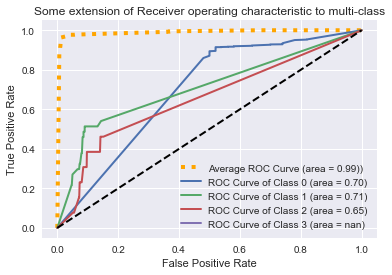

In [12]:
# Plot ROC curve for each class
predictions = plat_rfc.predict_proba(Xcon_test)

# Compute ROC curve and ROC AUC for each class
n_class = len(np.unique(yplatp_convert))
fpr= dict()
tpr = dict()
roc_auc = dict()
all_y_test_i = np.array([])
all_y_predict_proba = np.array([])

for i in range(n_class):
    y_test_i = list(map(lambda x: 1 if x == i else 0, ycon_test))
    all_y_test_i = np.concatenate([all_y_test_i, y_test_i])
    all_y_predict_proba = np.concatenate([all_y_predict_proba, predictions[:,i]])
    fpr[i], tpr[i],_= roc_curve(y_test_i, predictions[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr['average'], tpr['average'], _ = roc_curve(all_y_test_i, all_y_predict_proba)
roc_auc['average'] = auc(fpr['average'], tpr['average'])

# Plot Average ROC Curve
plt.plot(fpr['average'], tpr['average'], label = 'Average ROC Curve (area = {0:0.2f}))'.format(roc_auc['average']),
color='orange', linestyle = ':', linewidth=4)

# Plot Individual ROC Curves
for i in range(n_class):
    plt.plot(fpr[i], tpr[i], lw=2, label = 'ROC Curve of Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

plt.savefig('ROC_by_Class_RF.png', bbox_inches='tight')

In [13]:
# Fit models for plotting
# Split Target by Percent of TPS data
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp,yplatp, test_size=.3, random_state=42)

# Fit Newton, SAGA, and Scaled Newton data
newton = n_log.fit(Xp_train, yp_train)
saga = saga_pipe.fit(Xp_train, yp_train)
scaled_n = n_pipe.fit(Xp_train,yp_train)

# Fit Random Forest Classifier and AdaBoost data
rfc = plat_rfc.fit(Xcon_train, ycon_train)
adb = adb_plat.fit(Xcon_train, ycon_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [14]:
# Compute average ROCs for Different classifier models
def avg_roc(model, test_X = Xp_test, targets = yplatp, test_y = yp_test):
    # Plot ROC curve for each class
    predictions = model.predict_proba(test_X)

    # Compute ROC curve and ROC AUC for each class
    n_class = len(np.unique(targets))
    fpr= dict()
    tpr = dict()
    roc_auc = dict()
    all_y_test_i = np.array([])
    all_y_predict_proba = np.array([])

    for i in range(n_class):
        y_test_i = list(map(lambda x: 1 if x == i else 0, test_y))
        all_y_test_i = np.concatenate([all_y_test_i, y_test_i])
        all_y_predict_proba = np.concatenate([all_y_predict_proba, predictions[:,i]])
        fpr[i], tpr[i],_= roc_curve(y_test_i, predictions[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Get the Average fpr and tpr for plotting
    fpr['average'], tpr['average'], _ = roc_curve(all_y_test_i, all_y_predict_proba)
    roc_auc['average'] = auc(fpr['average'], tpr['average'])
    return fpr['average'], tpr['average'], roc_auc['average']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


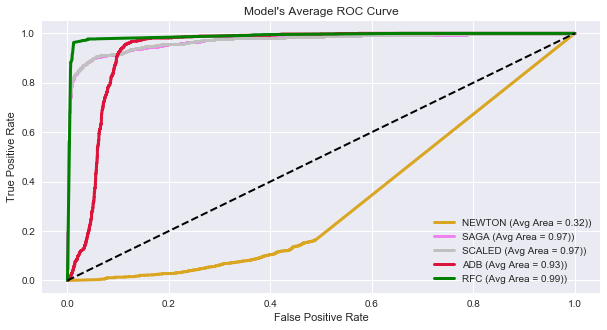

In [15]:
# Plot ROC curve for different classifiers
fig, ax = plt.subplots(1,1, figsize=(10,5))
fpr1, tpr1, avg1 = avg_roc(model=newton)
_ = ax.plot(fpr1,tpr1,label='NEWTON (Avg Area = {0:0.2f}))'.format(avg1),color='goldenrod',linewidth=3)
fpr2, tpr2, avg2 = avg_roc(model=saga)
_ = ax.plot(fpr2,tpr2,label='SAGA (Avg Area = {0:0.2f}))'.format(avg2),color='violet',linewidth=3)
fpr3, tpr3, avg3 = avg_roc(model=scaled_n)
_ = ax.plot(fpr3,tpr3,label='SCALED (Avg Area = {0:0.2f}))'.format(avg3),color='silver',linewidth=3)
fpr4, tpr4, avg4 = avg_roc(model=adb, test_X = Xcon_test, targets= yplatp_convert, test_y=ycon_test)
_ = ax.plot(fpr4,tpr4,label='ADB (Avg Area = {0:0.2f}))'.format(avg4),color='crimson',linewidth=3)
fpr5, tpr5, avg5 = avg_roc(model=plat_rfc, test_X = Xcon_test, targets= yplatp_convert, test_y=ycon_test)
_ = ax.plot(fpr5,tpr5,label='RFC (Avg Area = {0:0.2f}))'.format(avg5),color='green',linewidth=3)
_ = plt.plot([0, 1], [0, 1], 'k--', lw=2)

_ = ax.set_xlabel('False Positive Rate')
_ = ax.set_ylabel('True Positive Rate')
_ = ax.set_title("Model's Average ROC Curve")
_ = ax.legend(loc='lower right')

plt.show()